# Multiple Linear Regression 

# TASK: 1.Exploratory Data Analysis (EDA) and Preprocessing

C:\Users\G.S.AZARUDDIN\AppData\Local\Temp\ipykernel_25984\406658461.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


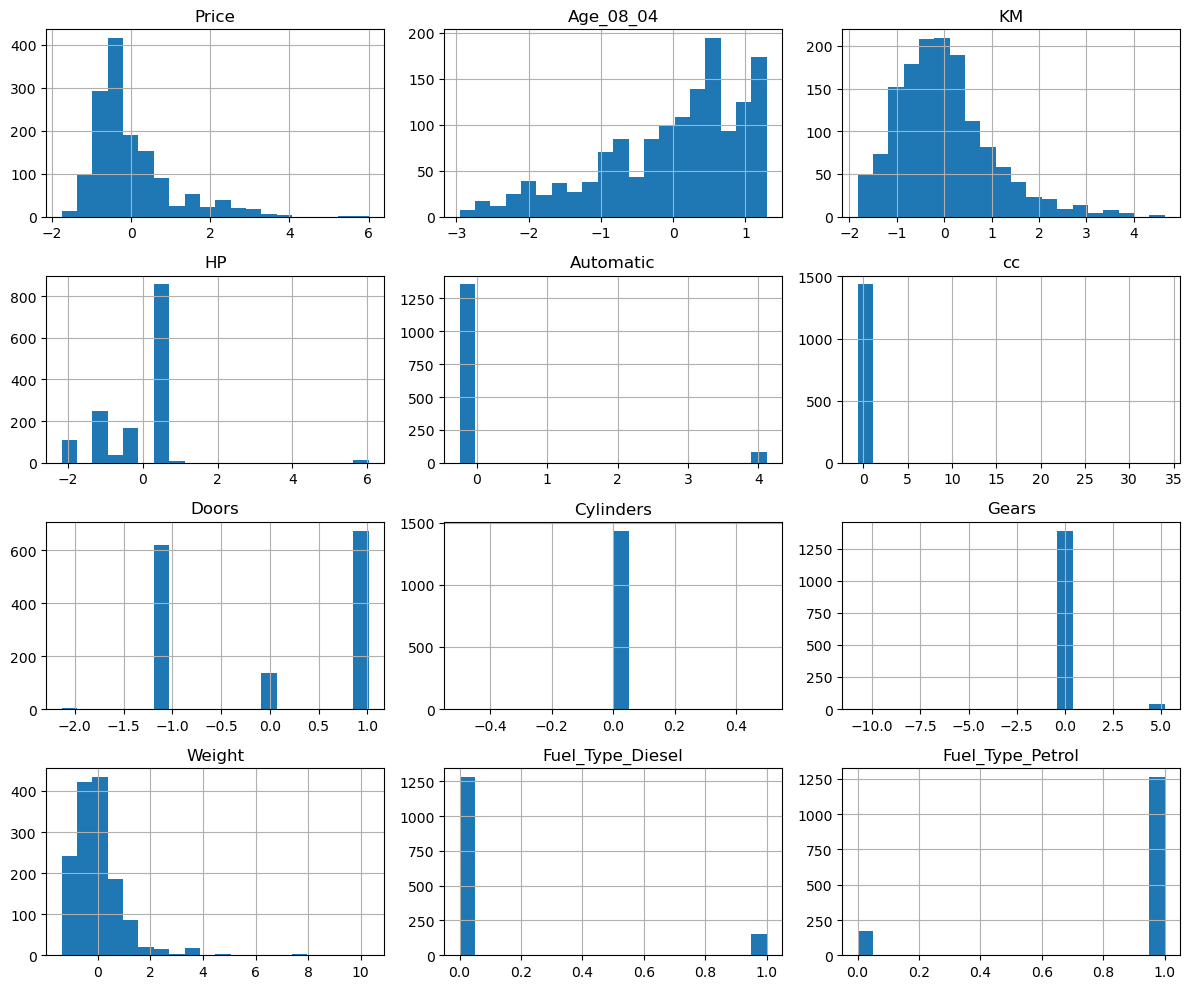

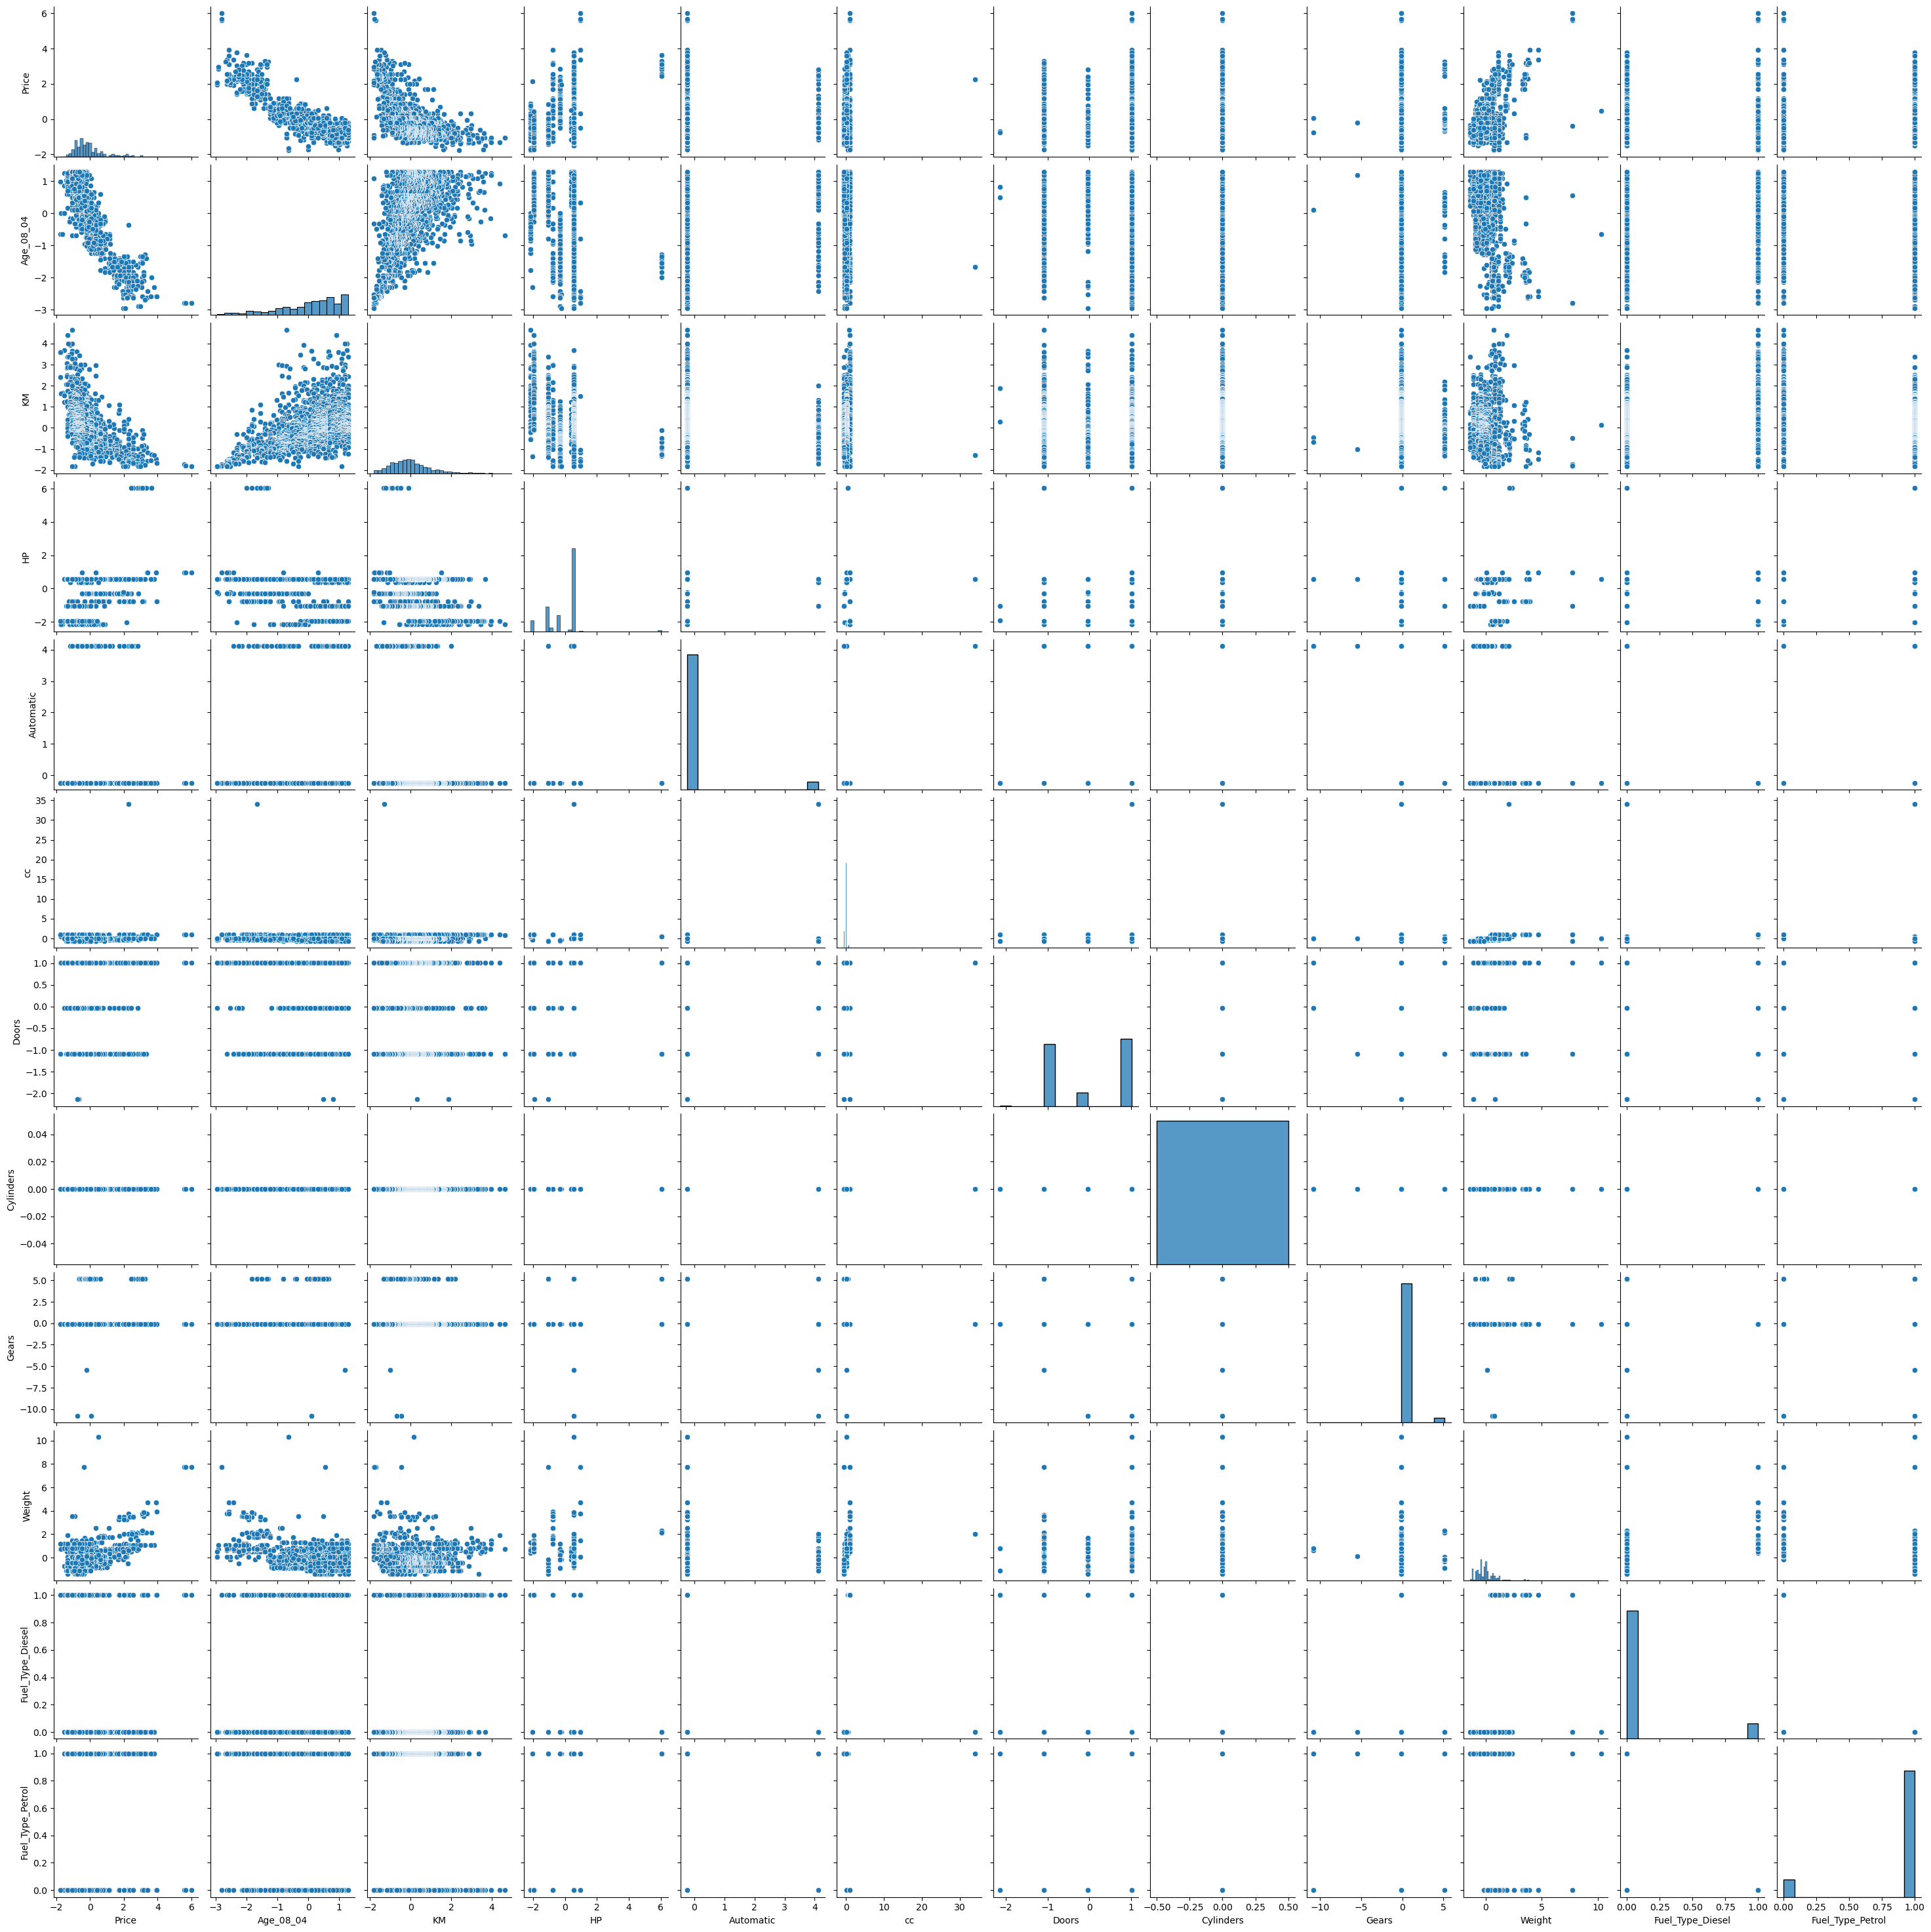

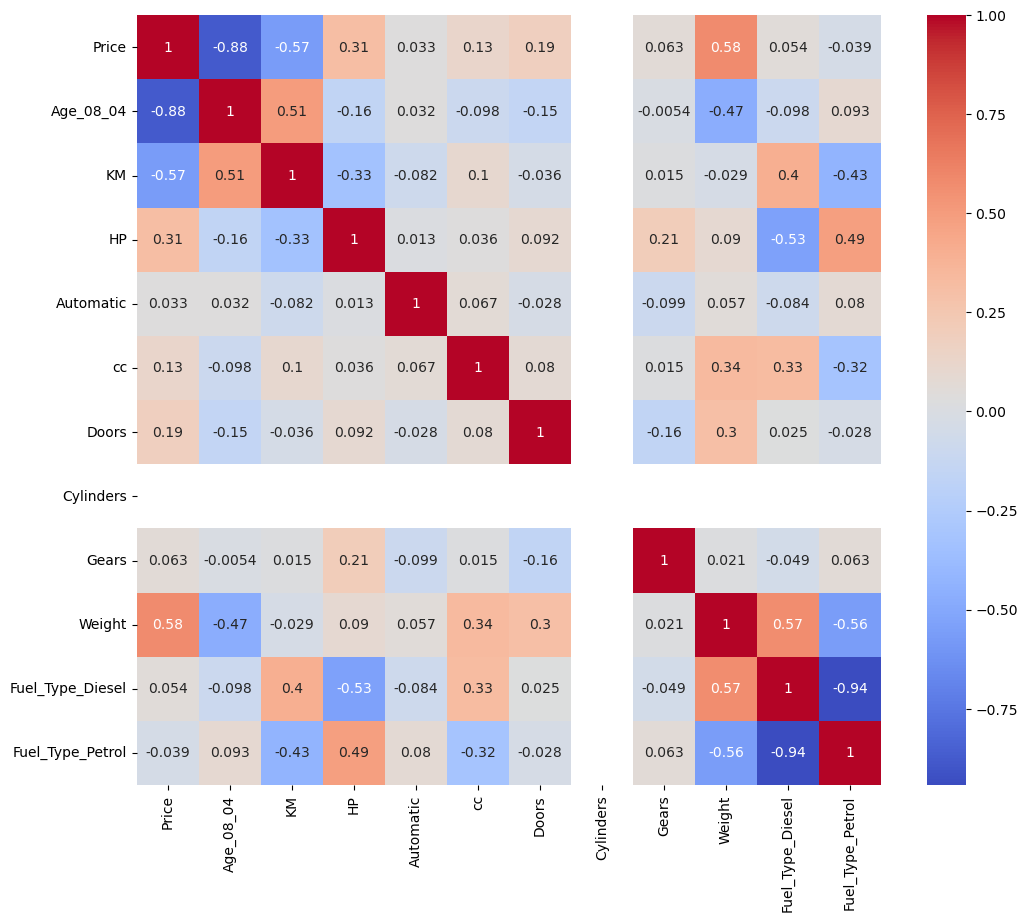

      Price  Age_08_04        KM        HP  Automatic        cc     Doors  \
0  0.763763  -1.771966 -0.574695 -0.768042  -0.242893  0.997419 -1.085139   
1  0.832715  -1.771966  0.117454 -0.768042  -0.242893  0.997419 -1.085139   
2  0.887877  -1.718184 -0.715386 -0.768042  -0.242893  0.997419 -1.085139   
3  1.163685  -1.610620 -0.547650 -0.768042  -0.242893  0.997419 -1.085139   
4  0.832715  -1.395491 -0.801028 -0.768042  -0.242893  0.997419 -1.085139   

   Cylinders     Gears    Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0        0.0 -0.140425  1.758561                 1                 0  
1        0.0 -0.140425  1.758561                 1                 0  
2        0.0 -0.140425  1.758561                 1                 0  
3        0.0 -0.140425  1.758561                 1                 0  
4        0.0 -0.140425  1.853577                 1                 0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #  

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\G.S.AZARUDDIN\Downloads\ToyotaCorolla - MLR.csv")
df.fillna(df.median(), inplace=True)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
scaler = StandardScaler()
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price',  'Automatic', 'Doors', 'Cylinders', 'Gears']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
sns.pairplot(df)
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
plt.show()
plt.show()
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())



# 2. Split the Dataset


In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3.Build Multiple Linear Regression Models

Model 1: Basic Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)


Coefficients: [-6.19649037e-01 -1.67849053e-01  5.79896895e-02  9.41502634e-03
 -3.55381401e-03 -1.58415813e-02  4.71844785e-16  2.86692887e-02
  3.75689692e-01 -1.89063432e-02  3.78081017e-01]
Intercept: -0.32638229775302674


Model 2: Polynomial Features

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=2, include_bias=False)
model2 = make_pipeline(poly, LinearRegression())
model2.fit(X_train, y_train)
print("Coefficients:", model2.named_steps['linearregression'].coef_)
print("Intercept:", model2.named_steps['linearregression'].intercept_)


Coefficients: [-3.54118859e-01 -3.64617308e-01 -4.63657084e-01 -8.30388154e-02
  6.32405294e+01  3.27760558e-02  3.19467161e-10 -3.66892990e-02
 -5.03354648e-01  1.04658062e+00  1.58645586e+00  9.39059571e-04
  7.56634968e-02  4.46956661e-02  1.18220848e-02 -2.08613601e-01
  6.36599607e-02  5.89900351e-12  1.89209434e-01 -2.20567183e-01
  2.85336739e-01 -2.41590603e-01 -3.37899563e-02 -3.64366158e-02
 -5.72337952e-03  7.94708277e-03 -3.39249621e-02 -1.58960872e-10
 -3.45588957e-03  1.13397150e-01  7.53038123e-02  2.59037522e-01
  3.08353513e-02 -1.98013941e-01 -1.12345910e-01 -4.77464177e-02
 -2.72704637e-11  3.72348243e-01  1.90438549e-02  6.78914897e-01
  3.51519547e-01 -3.21704386e-01  3.97401910e-01 -1.81262398e-02
 -7.69506681e-12 -6.80251496e-02 -1.60550232e-02 -2.54207195e-01
  1.38265085e+00 -7.44741157e-02 -3.98095560e-02 -1.81188398e-13
 -8.83326229e-02  1.31031806e-01 -6.25239652e+01 -6.28542616e+01
 -6.48076860e-02  0.00000000e+00  2.71257509e-01  9.67688859e-02
 -1.1695100

Model 3: Interaction Terms

In [28]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_interaction = interaction.fit_transform(X_train)
X_test_interaction = interaction.transform(X_test)
model3 = LinearRegression()
model3.fit(X_train_interaction, y_train)
print("Coefficients:", model3.coef_)
print("Intercept:", model3.intercept_)


Coefficients: [-2.96810910e-01 -4.87443420e-01 -8.90003664e-01 -9.03349646e-01
  7.01198170e+01  2.77558097e-02 -1.06780990e-11 -1.12777527e-02
 -4.79940467e-01  1.66404483e+00  3.02334773e+00  5.35294073e-02
  4.88242722e-02  3.34176192e-02 -1.75919420e-01  6.57803082e-02
  4.97862029e-11  1.51576186e-01 -2.45395675e-01  2.63456542e-01
 -3.05126287e-01 -2.59319903e-02 -1.93995551e-03 -3.38818179e-02
 -3.90227756e-02  5.39501083e-11 -5.91547700e-03  1.33066431e-01
  1.20534460e-01  3.71887918e-01  5.42950946e-02  3.58177679e-02
 -4.07489990e-02 -4.36378711e-12  1.16036177e-01  4.94483415e-02
  8.79112214e-01  8.90700484e-01 -1.47454583e-01 -2.00855097e-02
  4.65671945e-12 -4.10292590e-02  4.43384190e-03 -4.04184980e-01
  8.64552235e-01 -3.94453732e-02 -2.38031816e-13 -9.76822159e-02
  3.39246165e-02 -6.90970753e+01 -6.99140382e+01  0.00000000e+00
  1.51516039e-01  7.67096655e-02 -5.32517143e-02 -4.19865847e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.8408412

# 4. Evaluate Model Performance

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test_interaction)

# Evaluate Model 1
print("Model 1:")
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R^2:", r2_score(y_test, y_pred1))

# Evaluate Model 2
print("Model 2:")
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R^2:", r2_score(y_test, y_pred2))

# Evaluate Model 3
print("Model 3:")
print("MSE:", mean_squared_error(y_test, y_pred3))
print("R^2:", r2_score(y_test, y_pred3))


Model 1:
MSE: 0.1675865054809423
R^2: 0.834888804061108
Model 2:
MSE: 0.24330211306672667
R^2: 0.7602915416869584
Model 3:
MSE: 0.2232786907402048
R^2: 0.7800192112724877


# 5. Apply Lasso and Ridge Regression


In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Coefficients:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R^2:", r2_score(y_test, y_pred_lasso))


Lasso Coefficients: [-0.60731933 -0.13886304  0.04986204  0.          0.          0.
  0.          0.          0.18948162 -0.          0.        ]
Lasso Intercept: 0.002613706973463371
Lasso MSE: 0.17400385240333016
Lasso R^2: 0.8285662435299396


In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R^2:", r2_score(y_test, y_pred_ridge))


Ridge Coefficients: [-0.61956785 -0.16799094  0.05804343  0.00943146 -0.00355153 -0.01579385
  0.          0.02869469  0.37552322 -0.02067559  0.37564338]
Ridge Intercept: -0.32405266265662946
Ridge MSE: 0.16754290181156567
Ridge R^2: 0.8349317636894947


# Assumptions Made :
